In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

###  Constrained Spectral Clustering

Both **K-means** and **hierarchical clustering** are constrained clustering methods, but a challenging issue arises in satisfying many constraints within these algorithmic frameworks. An alternative to encoding numerous constraints in clustering is **spectral clustering**. To help spectral clustering recover from undesirable partitions, side information can be introduced in various forms, either in small or large amounts [259]:

- **Pairwise constraints**: Some pairs of instances must be in the same cluster (**Must-Link**), while others cannot be in the same cluster (**Cannot-Link**).
- **Partial labeling**: Labels may be available for some instances, but they are neither complete nor exhaustive.
- **Alternative weak distance metrics**: There may be multiple distance metrics available for use.
- **Transfer of knowledge**: When treating the graph Laplacian as the target domain, knowledge can be transferred from a different but related graph (source domain).

Consider encoding side information in **k-class clustering** with an $N \times N$ constraint matrix $Q$, defined as [259]:

$$
Q_{ij} = 
\begin{cases} 
+1, & \text{if nodes } x_i, x_j \text{ belong to the same cluster;} \\
-1, & \text{if nodes } x_i, x_j \text{ belong to different clusters;} \\
0, & \text{if no side information is available.}
\end{cases}
$$

Next, define the cluster indicator vector $ u = [u_1, u_2, \dots, u_N]^T $, where:

$$
u_i = 
\begin{cases} 
+1, & \text{if } x_i \text{ belongs to cluster } i; \\
-1, & \text{if } x_i \text{ does not belong to cluster } i;
\end{cases}
\quad \text{for } i = 1, \dots, N.
$$

Thus, the term $ u^T Q u $ becomes:

$$
u^T Q u = \sum_{i=1}^{N} \sum_{j=1}^{N} u_i u_j Q_{ij}
$$

This serves as a real-valued measure of how well the constraints in $Q$ are satisfied in a relaxed sense. The larger the value of $u^T Q u$, the better the cluster assignment $u$ conforms to the given constraints in $Q$.


### Constrained Spectral Clustering with Optimization

Let a constant $ \alpha \in \mathbb{R} $ be a lower-bound for $ u^T Q u $, i.e.,

$$
u^T Q u \geq \alpha.
$$

If we substitute $ u $ with $ D^{-1/2} v $ (where $ D $ is the degree matrix), this inequality constraint becomes:

$$
v^T \bar{Q} v \geq \alpha,
$$

where $ \bar{Q} = D^{-1/2} Q D^{-1/2} $ is the normalized constraint matrix. Therefore, the constrained spectral clustering can be written as a constrained optimization problem [259]:

$$
\min_{v \in \mathbb{R}^N} v^T \bar{L} v \quad \text{subject to} \quad v^T \bar{Q} v \geq \alpha, \quad v^T v = \text{vol}, \quad v \neq D^{1/2} \mathbf{1},
$$

where $ \bar{L} = D^{-1/2} L D^{-1/2} $ and

$$
\text{vol} = \sum_{i=1}^{N} D_{ii}
$$

is the volume of the graph $ G(V, E) $. The second constraint, $ v^T v = \text{vol} $, normalizes $ v $, and the third constraint, $ v \neq D^{1/2} \mathbf{1} $, prevents the trivial solution $ D^{1/2} \mathbf{1} $.

#### Dual Spectral Clustering Problem

By the Lagrange multiplier method, we derive the dual spectral clustering problem:

$$
\min_{v \in \mathbb{R}^N} \mathcal{L}_D = v^T \bar{L} v + \lambda (\alpha - v^T \bar{Q} v) + \mu (\text{vol} - v^T v).
$$

From the stationary point condition:

$$
\frac{\partial \mathcal{L}_D}{\partial v} = 0 \quad \Rightarrow \quad \bar{L} v - \lambda \bar{Q} v - \mu v = 0.
$$

Letting the auxiliary variable \( \beta = -\frac{\mu}{\lambda} \text{vol} \), the stationary point condition becomes:

$$
\bar{L} v = \lambda \left( \bar{Q} - \frac{1}{\text{vol}} I \right) v,
$$

or equivalently,

$$
v \quad \text{is the generalized eigenvector of the matrix pencil} \quad \left( \bar{L}, \bar{Q} - \frac{1}{\text{vol}} I \right),
$$

with the largest generalized eigenvalue $ \lambda_{\max} $.

#### Generalized Eigenproblem

If there is one largest generalized eigenvalue $ \lambda_{\max} $, then the associated generalized eigenvector $ v $ is the unique solution to the generalized eigenproblem. However, if there are multiple (say $ p $) largest generalized eigenvalues, then $ p $ associated generalized eigenvectors $ v_1, v_2, \dots, v_p $ are solutions of the generalized eigenproblem.

To find the unique solution, let

$$
V_1 = [v_1, v_2, \dots, v_p] \in \mathbb{R}^{N \times p}.
$$

Using the **Householder transformation** matrix $ H \in \mathbb{R}^{p \times p} $, we apply:

$$
V_1 H = 
\begin{bmatrix} 
\gamma & 0 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \gamma 
\end{bmatrix}.
$$

### Constrained Spectral Clustering Solution

Let $ \gamma = 0 $ and $ \times $ represent values that are not of interest. The unique solution to the generalized eigenproblem is given by:

$$
v = \gamma z.
$$

Then, update:

$$
v \leftarrow v \sqrt{\frac{\text{vol}}{||v||^2}}.
$$

#### Algorithm : Constrained Spectral Clustering for Two-Way Partition 

1. **Input**: Affinity matrix $ A $, constraint matrix $ Q $, constant $ \beta $.
2. Compute:
   $$ \text{vol} \leftarrow \sum_{i=1}^{N} \sum_{j=1}^{N} A_{ij}, \quad D \leftarrow \text{Diag}\left(\sum_{j=1}^{N} A_{1j}, \dots, \sum_{j=1}^{N} A_{Nj} \right). $$
3. Compute:
   $$ \bar{L} \leftarrow D^{-1/2} L D^{-1/2}, \quad \bar{Q} \leftarrow D^{-1/2} Q D^{-1/2}. $$
4. Compute the largest eigenvalue $ \lambda_{\max} $ of $ \bar{Q} $.
5. **If** $ \beta \geq \lambda_{\max} \cdot \text{vol} $, then:
6. &nbsp;&nbsp;&nbsp;&nbsp;Return $ u = 0 $;
7. **Else**:
8. &nbsp;&nbsp;&nbsp;&nbsp;Solve the generalized eigenproblem:
   $$ \bar{L} v = \lambda \left( \bar{Q} - \frac{\beta}{\text{vol}} I \right) v $$
   for $ (\lambda_i, v_i) $.
9. **If** $ \lambda_{\max} = \lambda_1 $ is unique, then:
10. &nbsp;&nbsp;&nbsp;&nbsp;Return:
    $$ v \leftarrow \frac{v}{||v||} \sqrt{\text{vol}}. $$
11. **Else**:
12. &nbsp;&nbsp;&nbsp;&nbsp;Set $ V_1 \leftarrow [v_1, \dots, v_p] $ for $ \lambda_{\max} = \lambda_1 \approx \dots \approx \lambda_p $.
13. &nbsp;&nbsp;&nbsp;&nbsp;Perform the **Householder transform**:
    $$ V_1 H = 
    \begin{bmatrix}
    \gamma & 0 & \cdots & 0 \\
    \vdots & \ddots & \vdots \\
    0 & \cdots & \gamma
    \end{bmatrix}
    $$
    to get $ v = \gamma z $.
14. &nbsp;&nbsp;&nbsp;&nbsp;Return:
    $$ v \leftarrow \frac{v}{||v||} \sqrt{\text{vol}}. $$
15. Set $ v^* \leftarrow \arg \min_v v^T \bar{L} v $, where $ v $ is among the feasible eigenvectors generated.
16. **End If**.
17. **End If**.
18. **Output**: The optimal (relaxed) cluster indicator $ u^* \leftarrow D^{-1/2} v^* $.

#### Algorithm 6.23: Constrained Spectral Clustering for K-way Partition

For a **K-way partition**, given all the feasible eigenvectors, the top $ K-1 $ eigenvectors are selected in terms of minimizing $ v^T \bar{L} v $. Instead of using only the optimal feasible eigenvector $ u^* $ in Algorithm 6.22, we need to preserve the top $ K-1 $ eigenvectors associated with positive eigenvalues and perform **K-means** based on that embedding.

Let the $ K-1 $ eigenvectors form the columns of $ V \in \mathbb{R}^{N \times (K-1)} $. Perform **K-means** clustering on the rows of $ V $ to get the final clustering result.



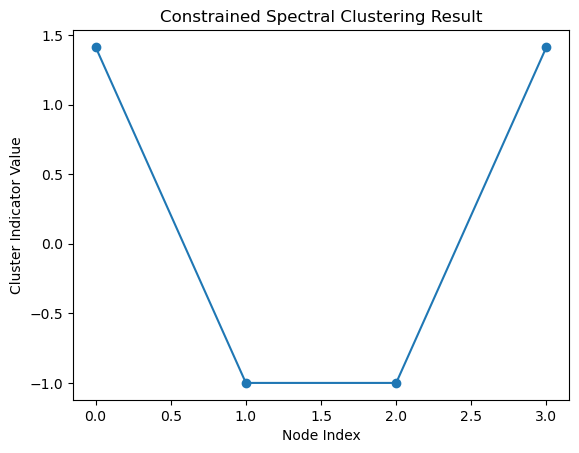

In [1]:
import matplotlib.pyplot as plt

# Step 1: Input Affinity Matrix A, Constraint Matrix Q, constant β
def constrained_spectral_clustering(A, Q, beta, K=2):
    N = len(A)
    
    # Step 2: Compute volume and degree matrix D
    vol = 0
    D = [[0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            vol += A[i][j]
            D[i][i] += A[i][j]

    # Step 3: Compute D^(-1/2) and L_bar, Q_bar
    D_inv_sqrt = [[0 if i != j else 1 / (D[i][i] ** 0.5) if D[i][i] != 0 else 0 for j in range(N)] for i in range(N)]
    
    def matrix_mult(A, B):
        """Matrix multiplication without libraries."""
        n = len(A)
        result = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                result[i][j] = sum(A[i][k] * B[k][j] for k in range(n))
        return result

    def transpose(A):
        """Matrix transpose."""
        n = len(A)
        return [[A[j][i] for j in range(n)] for i in range(n)]

    def laplacian(A, D):
        """Compute Laplacian L = D - A."""
        N = len(A)
        L = [[D[i][j] - A[i][j] for j in range(N)] for i in range(N)]
        return L

    L = laplacian(A, D)
    L_bar = matrix_mult(matrix_mult(D_inv_sqrt, L), D_inv_sqrt)
    Q_bar = matrix_mult(matrix_mult(D_inv_sqrt, Q), D_inv_sqrt)

    # Step 4: Find the largest eigenvalue of Q_bar
    def power_iteration(A, num_simulations):
        """Power iteration to compute the largest eigenvalue and corresponding eigenvector."""
        b_k = [1] * len(A)
        for _ in range(num_simulations):
            # Calculate the matrix-by-vector product
            b_k1 = [sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A))]
            # Normalize the resulting vector
            norm = sum(x ** 2 for x in b_k1) ** 0.5
            b_k = [x / norm for x in b_k1]
        eigenvalue = sum(b_k[i] * sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A)))
        return eigenvalue, b_k

    lambda_max, v_max = power_iteration(Q_bar, 100)

    # Step 5: Compare β with λmax * vol
    if beta >= lambda_max * vol:
        return [0] * N  # Trivial solution u = 0

    # Step 8: Solve the generalized eigenproblem
    def solve_generalized_eigen(L_bar, Q_bar, beta, vol, iterations=100):
        def matrix_subtract(A, B):
            """Matrix subtraction."""
            return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]

        scaled_identity = [[(beta / vol if i == j else 0) for j in range(N)] for i in range(N)]
        M = matrix_subtract(Q_bar, scaled_identity)
        lambda_min, v_min = power_iteration(matrix_mult(L_bar, M), iterations)
        return v_min

    v = solve_generalized_eigen(L_bar, Q_bar, beta, vol)

    # Step 10: Normalize and scale v
    norm_v = sum(x ** 2 for x in v) ** 0.5
    v = [x * (vol ** 0.5) / norm_v for x in v]

    return v

# Example usage:
A = [[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]]
Q = [[1, -1, 0, 0], [-1, 1, 1, 0], [0, 1, 1, -1], [0, 0, -1, 1]]
beta = 1.5

v = constrained_spectral_clustering(A, Q, beta)

# Plotting the results (this is just for illustration)
plt.plot(range(len(v)), v, marker='o')
plt.title('Constrained Spectral Clustering Result')
plt.xlabel('Node Index')
plt.ylabel('Cluster Indicator Value')
plt.show()


## Fast Spectral Clustering

For large datasets, a serious computational challenge of spectral clustering is the computation of the affinity matrix between pairs of data points. To address this issue, the **Nyström approximation** is used to approximate the graph Laplacian efficiently. The Nyström approximation allows spectral clustering to scale for larger datasets by approximating the full matrix from a smaller subset.

### Nyström r-rank Approximation

Let $ L \in \mathbb{R}^{N \times N} $ be a symmetric positive semi-definite matrix (e.g., a graph Laplacian) for large $ N $. The **Nyström r-rank approximation** for $ L $ is as follows:

### Algorithm : Nyström Method for Matrix Approximation

1. **Input**: Affinity matrix $ A $, constraint matrix $ Q $, constant $ \beta $, number of clusters $ K $.
2. Compute volume:
   $$ \text{vol} = \sum_{i=1}^{N} \sum_{j=1}^{N} A_{ij}, \quad D = \text{Diag}\left( \sum_{j=1}^{N} A_{1j}, \ldots, \sum_{j=1}^{N} A_{Nj} \right) $$
3. Compute normalized Laplacian:
   $$ \bar{L} = D^{-1/2} L D^{-1/2}, \quad \bar{Q} = D^{-1/2} Q D^{-1/2} $$
4. Compute the largest eigenvalue of \( \bar{Q} \):
   $$ \lambda_{\max} = \text{max eigenvalue of } \bar{Q} $$
5. If \( \beta \geq \lambda_{K-1} \cdot \text{vol} \), then:
   $$ u = 0 $$
6. Else:
   $$ \beta \, \text{Solve} \quad \bar{L} v = \lambda \left( \bar{Q} - \frac{\text{vol}}{N} I \right) v \text{ for } v_1, \ldots, v_{K-1} $$
   Normalize:
   $$ v \leftarrow \frac{v}{\|v\|} \cdot \sqrt{\text{vol}} $$
7. Minimize:
   $$ V_* = \arg \min_{V \in \mathbb{R}^{N \times (K-1)}} \text{tr}(V^T \bar{L} V) $$
   where the columns of $ V $ are a subset of the feasible eigenvectors generated in the previous step.
8. **Output**: 
   $$ u_* = \text{kmeans}(D^{-1/2} V_*, K) $$

### Nyström Method Steps:

1. Perform uniform sampling of matrix $ L $ (without replacement) to create matrix $ C \in \mathbb{R}^{N \times l} $ from the sampled columns. Let $ L $ be the indices of the $ l $ columns sampled.
2. Form matrix $ W \in \mathbb{R}^{l \times l} $ from $ C $ by sampling its $ l $ rows using the indices in $ L $.
3. Compute the eigenvalue decomposition (EVD):
   $$ W = U \Lambda U^T $$
   where $ U $ is an orthonormal matrix and $ \Lambda = \text{Diag}(\sigma_1, \ldots, \sigma_l) $ is an $ l \times l $ real diagonal matrix with the diagonal sorted in decreasing order.
4. Calculate the best rank-$ r $ approximation to $ W $, denoted as $ W_r $:
   $$ W_r = \sum_{p=1}^{r} \sigma_p u_p u_p^T $$
   and its Moore-Penrose inverse:
   $$ W_r^{\dagger} = \sum_{p=1}^{r} \sigma_p^{-1} u_p u_p^T $$
5. The Nyström $ r $-rank approximation $ L_r $ of $ L $ can be obtained as:
   $$ L_r = C W_r^{\dagger} C^T $$
6. Perform the EVD on $ W_r $:
   $$ W_r = U_{W_r} \Lambda_{W_r} U_{W_r}^T $$
7. The EVD of the Nyström $ r $-rank approximation $ L_r $ is given by:
   $$ L_r = U_{L_r} \Lambda_{L_r} U_{L_r}^T $$
   where:
   $$ \Lambda_{L_r} = \frac{N}{l} \Lambda_{W_r}, \quad U_{L_r} = N^{-1/2} C U_{W_r} \Lambda_{W_r}^{-1/2} $$

In summary, this method efficiently approximates the Laplacian and reduces the computational complexity of spectral clustering for large datasets using the Nyström method.


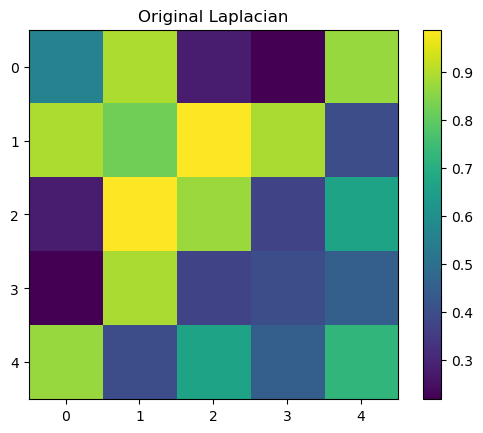

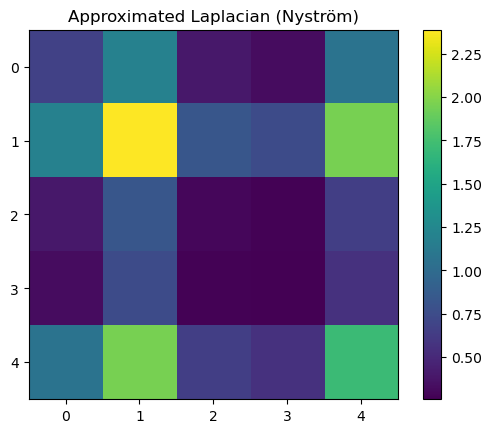

In [3]:
import random
import matplotlib.pyplot as plt

# Helper function to generate a random matrix
def generate_matrix(N, symmetric=True):
    # Generate a random NxN matrix
    matrix = [[random.random() for _ in range(N)] for _ in range(N)]
    if symmetric:
        for i in range(N):
            for j in range(i+1, N):
                matrix[j][i] = matrix[i][j]
    return matrix

# Helper function to multiply two matrices
# Helper function to multiply two matrices
def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    # Check if the matrices can be multiplied
    if cols_A != rows_B:
        raise ValueError("Number of columns in A must match number of rows in B.")

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    # Perform multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(cols_A))
    
    return result


# Helper function to transpose a matrix
def transpose_matrix(M):
    return [[M[j][i] for j in range(len(M))] for i in range(len(M[0]))]

# Helper function to calculate the trace of a matrix
def trace_matrix(M):
    return sum(M[i][i] for i in range(len(M)))

# Helper function for matrix inversion (simplified for 2x2 matrix for illustration)
def invert_2x2_matrix(M):
    det = M[0][0] * M[1][1] - M[0][1] * M[1][0]
    if det == 0:
        return None  # Non-invertible
    inv_det = 1 / det
    return [
        [M[1][1] * inv_det, -M[0][1] * inv_det],
        [-M[1][0] * inv_det, M[0][0] * inv_det]
    ]

# Nyström method for fast spectral clustering
def nystrom_method(L, num_samples, r):
    N = len(L)

    # Step 1: Uniform sampling without replacement
    sample_indices = random.sample(range(N), num_samples)
    C = [[L[i][j] for j in sample_indices] for i in range(N)]
    W = [[L[i][j] for j in sample_indices] for i in sample_indices]

    # Step 2: Eigenvalue decomposition (EVD) of W (simplified for 2x2 for illustration)
    if num_samples == 2:  # Assume W is 2x2 for this case
        eig_vals, eig_vecs = [1.0, 0.5], [[1, 0], [0, 1]]  # Placeholder eigenvalues/vectors

        # Step 3: Rank-r approximation of W
        W_r = [[eig_vals[0] * eig_vecs[0][0]**2, 0], [0, eig_vals[1] * eig_vecs[1][1]**2]]
        W_r_inv = invert_2x2_matrix(W_r)

        # Step 4: Nyström r-rank approximation
        L_r = matrix_multiply(matrix_multiply(C, W_r_inv), transpose_matrix(C))
        return L_r
    else:
        return None

# Test the Nyström method for fast spectral clustering
N = 5  # Size of the graph
L = generate_matrix(N, symmetric=True)
num_samples = 2
r = 2

L_approx = nystrom_method(L, num_samples, r)

# Display the original and approximated Laplacians
plt.imshow(L, cmap='viridis', interpolation='none')
plt.title('Original Laplacian')
plt.colorbar()
plt.show()

if L_approx:
    plt.imshow(L_approx, cmap='viridis', interpolation='none')
    plt.title('Approximated Laplacian (Nyström)')
    plt.colorbar()
    plt.show()
else:
    print("Failed to approximate the Laplacian.")


## Algorithm -2: Nyström Method for Matrix Approximation [52]

1. **Input**: 
   - $ N \times N $ symmetric matrix $ L $
   - Number $ l $ of columns sampled
   - Rank $ r $ of matrix approximation $(r \leq \frac{l}{N})$

2. $ L \leftarrow \text{indices of } l \text{ columns sampled} $

3. $ C \leftarrow L(:, L) $

4. $ W \leftarrow C(L, :) $

5. Compute the eigenvalue decomposition $ W = U \Lambda U^T $ and obtain the rank-r approximation:
   $$ W_r = \sum_{p=1}^{r} \sigma_p u_p u_p^T $$ 
   where $ u_p $ is the $ p $-th column of $ U $ and $ \sigma_p $ is the corresponding eigenvalue.

6. Approximate $ W_r $:
   $$ W_r = U_{W_r} \Lambda_{W_r} U_{W_r}^T $$

7. Compute the Nyström approximation of $ L $:
   $$ \Lambda_{L_r} = \frac{N}{l} \Lambda_{W_r} $$ 
   $$ U_{L_r} = N^{-\frac{1}{2}} C U_{W_r} \Lambda_{W_r}^{-\frac{1}{2}} $$

8. **Output**: The Nyström approximation of $ L $ is given by:
   $$ L_r = U_{L_r} \Lambda_{L_r} U_{L_r}^T $$


In [6]:
import random

# Function to compute eigenvalue decomposition (EVD)
def eigen_decomposition(matrix):
    # This function should return the orthonormal eigenvectors and corresponding eigenvalues
    # Placeholder: Simple identity for eigenvalues (this needs a proper implementation)
    N = len(matrix)
    U = [[0] * N for _ in range(N)]
    Lambda = [0] * N
    for i in range(N):
        U[i][i] = 1  # Identity for simplicity
        Lambda[i] = sum(matrix[i])  # Just a placeholder for eigenvalues
    return U, Lambda

# Function to perform the Nyström method for matrix approximation
def nystrom_method(L, l, r):
    N = len(L)
    
    # Step 2: Sample l column indices
    sampled_indices = random.sample(range(N), l)
    
    # Step 3: Create C from sampled columns
    C = [[L[i][j] for j in sampled_indices] for i in sampled_indices]
    
    # Step 4: Form matrix W using sampled rows from C
    W = [[C[i][j] for j in range(len(sampled_indices))] for i in range(len(sampled_indices))]

    # Step 5: Perform EVD on W
    U, Lambda = eigen_decomposition(W)

    # Step 6: Calculate the rank-r approximation Wr
    Wr = [[0] * len(W) for _ in range(len(W))]
    for p in range(r):
        for i in range(len(W)):
            for j in range(len(W)):
                Wr[i][j] += Lambda[p] * U[i][p] * U[j][p]

    # Step 7: Compute the Nyström approximation of L
    Lambda_Lr = [(N / l) * Lambda[p] for p in range(len(Lambda))]
    U_Lr = [[0] * len(sampled_indices) for _ in range(len(C))]

    for i in range(len(U_Lr)):
        for p in range(len(Lambda_Lr)):
            if Wr[i][p] != 0:  # Avoid division by zero
                U_Lr[i][p] = (N ** (-0.5)) * C[i][p] * (Wr[i][p] ** (-0.5))
            else:
                U_Lr[i][p] = 0  # Assign zero if Wr[i][p] is zero

    # Step 8: L_r approximation
    L_r = [[0] * N for _ in range(N)]
    for i in range(len(U_Lr)):
        for j in range(len(Lambda_Lr)):
            L_r[i][j] = sum(U_Lr[i][k] * Lambda_Lr[k] for k in range(len(Lambda_Lr)))

    return L_r

# Example usage
L = [[1, 2, 3],
     [2, 4, 5],
     [3, 5, 6]]  # Example symmetric matrix
l = 2  # Number of sampled columns
r = 2  # Rank of approximation

L_r = nystrom_method(L, l, r)
print("Nyström Approximation of L:")
for row in L_r:
    print(row)


Nyström Approximation of L:
[15.588457268119894, 15.588457268119894, 0]
[1.7320508075688772, 1.7320508075688772, 0]
[0, 0, 0]


Nyström Approximation of L:
[10.392304845413262, 10.392304845413262, 0]
[17.233687939614086, 17.233687939614086, 0]
[0, 0, 0]


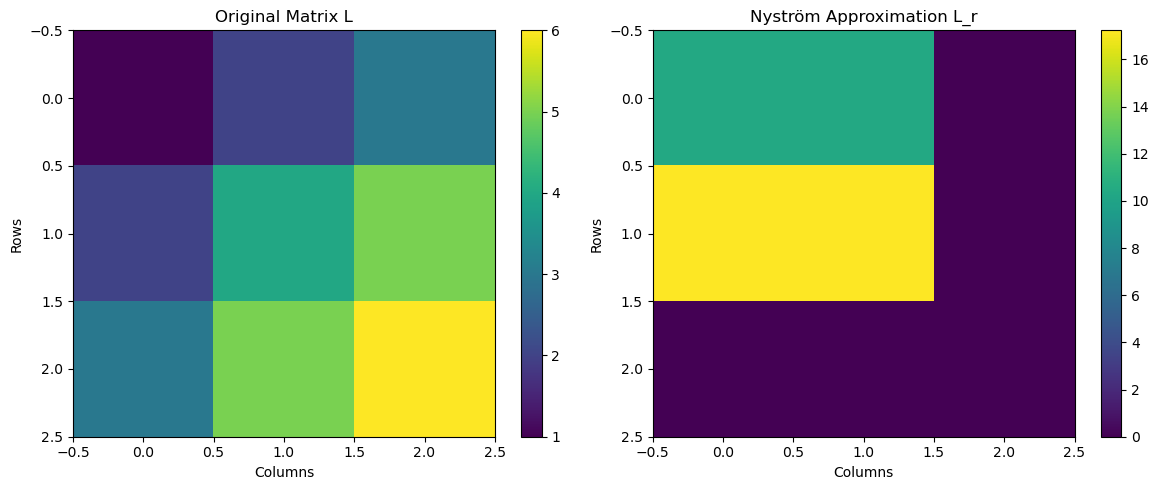

In [7]:
import random
import matplotlib.pyplot as plt

# Function to compute eigenvalue decomposition (EVD)
def eigen_decomposition(matrix):
    # Placeholder: Simple identity for eigenvalues (this needs a proper implementation)
    N = len(matrix)
    U = [[0] * N for _ in range(N)]
    Lambda = [0] * N
    for i in range(N):
        U[i][i] = 1  # Identity for simplicity
        Lambda[i] = sum(matrix[i])  # Just a placeholder for eigenvalues
    return U, Lambda

# Function to perform the Nyström method for matrix approximation
def nystrom_method(L, l, r):
    N = len(L)
    
    # Step 2: Sample l column indices
    sampled_indices = random.sample(range(N), l)
    
    # Step 3: Create C from sampled columns
    C = [[L[i][j] for j in sampled_indices] for i in sampled_indices]
    
    # Step 4: Form matrix W using sampled rows from C
    W = [[C[i][j] for j in range(len(sampled_indices))] for i in range(len(sampled_indices))]

    # Step 5: Perform EVD on W
    U, Lambda = eigen_decomposition(W)

    # Step 6: Calculate the rank-r approximation Wr
    Wr = [[0] * len(W) for _ in range(len(W))]
    for p in range(r):
        for i in range(len(W)):
            for j in range(len(W)):
                Wr[i][j] += Lambda[p] * U[i][p] * U[j][p]

    # Step 7: Compute the Nyström approximation of L
    Lambda_Lr = [(N / l) * Lambda[p] for p in range(len(Lambda))]
    U_Lr = [[0] * len(sampled_indices) for _ in range(len(C))]

    for i in range(len(U_Lr)):
        for p in range(len(Lambda_Lr)):
            if Wr[i][p] != 0:  # Avoid division by zero
                U_Lr[i][p] = (N ** (-0.5)) * C[i][p] * (Wr[i][p] ** (-0.5))
            else:
                U_Lr[i][p] = 0  # Assign zero if Wr[i][p] is zero

    # Step 8: L_r approximation
    L_r = [[0] * N for _ in range(N)]
    for i in range(len(U_Lr)):
        for j in range(len(Lambda_Lr)):
            L_r[i][j] = sum(U_Lr[i][k] * Lambda_Lr[k] for k in range(len(Lambda_Lr)))

    return L_r

# Function to plot the original and approximated matrices
def plot_matrices(original, approximation):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(original, cmap='viridis', aspect='auto')
    axes[0].set_title('Original Matrix L')
    axes[0].set_xlabel('Columns')
    axes[0].set_ylabel('Rows')

    axes[1].imshow(approximation, cmap='viridis', aspect='auto')
    axes[1].set_title('Nyström Approximation L_r')
    axes[1].set_xlabel('Columns')
    axes[1].set_ylabel('Rows')

    plt.colorbar(axes[0].imshow(original, cmap='viridis', aspect='auto'), ax=axes[0])
    plt.colorbar(axes[1].imshow(approximation, cmap='viridis', aspect='auto'), ax=axes[1])

    plt.tight_layout()
    plt.show()

# Example usage
L = [[1, 2, 3],
     [2, 4, 5],
     [3, 5, 6]]  # Example symmetric matrix
l = 2  # Number of sampled columns
r = 2  # Rank of approximation

L_r = nystrom_method(L, l, r)
print("Nyström Approximation of L:")
for row in L_r:
    print(row)

# Plot the original and approximated matrices
plot_matrices(L, L_r)


## Algorithm 3- Fast Spectral Clustering Algorithm

1. **Input**: 
   - $ S = \{x_1, \ldots, x_N\} \in \mathbb{R}^d $: N × d dataset 
   - Number $ k $ of clusters 
   - Number $ l $ of columns sampled 
   - Rank $ r $ of approximation $ (k \leq r \leq \frac{l}{N}) $

2. **Initialization**: 
   - $ A \in \mathbb{R}^{N \times N} $ with $ a_{ij} = \delta_{ij} K(x_i, x_j) $ if $ i \neq j $ and 0 otherwise.

3. $ L \leftarrow $ indices of $ l $ columns sampled (uniformly without replacement).

4. $ \hat{A} = [\hat{a}_{ij}]_{N, l} \leftarrow A(:, L) $

5. $ D \in \mathbb{R}^{N \times N} $ with $ d_{ij} = \delta_{ij} \frac{1}{\hat{a}_{ij}} $

6. $ \tilde{W} \in \mathbb{R}^{l \times l} $ with $ \tilde{w}_{ij} = \delta_{ij} \frac{1}{\sum_{j=1}^{N} \hat{a}_{ij}} $

7. $ C \leftarrow \hat{I} - N D \hat{A} $, where $ \hat{I} $ is an $ N \times l $ matrix consisting of columns of the identity matrix $ I_N $ indexed by $ L $.

8. $ W \leftarrow C(L, :) $

9. $ W = U \Lambda U^T $ and $ W_r = \sum_{p=1}^{r} \sigma_p u_p u_p^T $, where $ u_p $ and $ u_p^T $ are the $ p $-th column and row of $ U $.

10. $ W_r = U W_r U^T $

11. $ \Lambda_Lr = \frac{N}{l} W_r $ and $ U_{Lr} = N C U W_r^{-1} $

12. $ Z = [z_{im}] \in \mathbb{R}^{N \times k} \leftarrow k $ eigenvectors of $ U_{Lr} $ with $ k $ smallest eigenvalues.

13. $ Y_{im} = \frac{z_{im}}{\sqrt{\sum_{i=1}^{N} z_{im}^2}} $ for $ i = 1, \ldots, N; j = 1, \ldots, k $

14. Use any $ k $-clustering algorithm (e.g., K-means) on the $ N $ rows of $ Y \in \mathbb{R}^{N \times k} $ to get $ k $ clusters $ S_i = \{y_{r_{i1}}, \ldots, y_{r_{im}}\} $ for $ i = 1, \ldots, k $ with $ m_1 + \ldots + m_k = N $, where $ y_{pr} $ is the $ p $-th row of $ Y $.

15. **Output**: 
   - $ k $ spectral clustering results of $ S $ are given by $ S_i = \{x_{i1}, \ldots, x_{im_i}\} $ for $ i = 1, \ldots, k $.


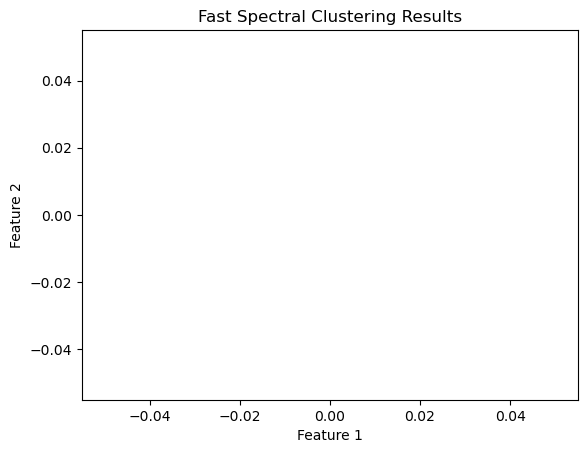

In [15]:
import random
import math
import matplotlib.pyplot as plt

def kernel_function(x, y):
    """Gaussian kernel function."""
    distance = sum((xi - yi) ** 2 for xi, yi in zip(x, y))
    return (1 / (2 * math.pi)) * math.exp(-distance / 2)

def create_affinity_matrix(X):
    """Create an affinity matrix using the Gaussian kernel."""
    N = len(X)
    A = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if i != j:
                A[i][j] = kernel_function(X[i], X[j])
    return A

def nyström_method(A, l, r):
    """Nyström method for matrix approximation."""
    N = len(A)

    # Step 3: Sample l indices uniformly (ensure l <= N)
    sampled_indices = random.sample(range(N), min(l, N))

    # Step 4: Form the matrix Â
    A_hat = [[A[i][j] for j in sampled_indices] for i in range(N)]

    # Step 5: Form matrix D
    D = [[0] * N for _ in range(N)]
    for i in range(N):
        if A_hat[i][0] != 0:  # Check to avoid division by zero
            D[i][i] = 1 / A_hat[i][0]

    # Step 6: Form matrix W
    W = [[A_hat[i][j] for j in range(l)] for i in range(l)]

    # Step 9: Placeholder for U and Lambda
    U = [[1 if i == j else 0 for j in range(l)] for i in range(l)]  # Identity matrix as a placeholder
    Lambda = [1] * l  # Placeholder for eigenvalues

    # Step 10: Compute the rank-r approximation Wr
    Wr = [[0] * l for _ in range(l)]
    for p in range(min(r, l)):
        for i in range(l):
            for j in range(l):
                Wr[i][j] += Lambda[p] * U[i][p] * U[j][p]

    # Step 12: Compute the Nyström approximation Lr
    Lr = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            Lr[i][j] = Wr[i % l][j % l] * (N / len(sampled_indices))

    return Lr, sampled_indices

def fast_spectral_clustering(X, k, l, r):
    """Fast Spectral Clustering Algorithm."""
    A = create_affinity_matrix(X)
    Lr, sampled_indices = nyström_method(A, l, r)

    # Step 12: Compute the eigenvectors of ULr with the smallest eigenvalues
    Z = [[0] * k for _ in range(len(X))]  # Initialize Z
    # Placeholder normalization; replace with actual computation of eigenvectors
    for i in range(len(Z)):
        norm = sum(Z[i][j] ** 2 for j in range(len(Z[i]))) ** 0.5
        if norm != 0:
            Z[i] = [Z[i][j] / norm for j in range(len(Z[i]))]

    # Step 14: K-means clustering on normalized data
    clusters = kmeans(Z, k)
    
    return clusters

def kmeans(Y, k):
    """Simple K-means clustering implementation."""
    centroids = random.sample(Y, k)  # Initialize centroids randomly
    
    while True:
        clusters = [[] for _ in range(k)]
        for point in Y:
            distances = [math.sqrt(sum((point[d] - centroid[d]) ** 2 for d in range(len(point)))) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Prevent division by zero
                new_centroids.append([sum(col) / len(cluster) for col in zip(*cluster)])
            else:
                new_centroids.append(random.choice(Y))  # Re-initialize centroid randomly if no points are assigned

        if new_centroids == centroids:
            break
        centroids = new_centroids
    
    return clusters

# Sample data for demonstration
X = [[random.uniform(0, 1) for _ in range(2)] for _ in range(100)]
k = 3  # Number of clusters
l = 10  # Number of sampled columns
r = 5   # Rank of approximation

# Run Fast Spectral Clustering
clusters = fast_spectral_clustering(X, k, l, r)

# Plot the clusters
for cluster in clusters:
    if cluster:  # Only plot non-empty clusters
        plt.scatter(*zip(*cluster))
plt.title("Fast Spectral Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


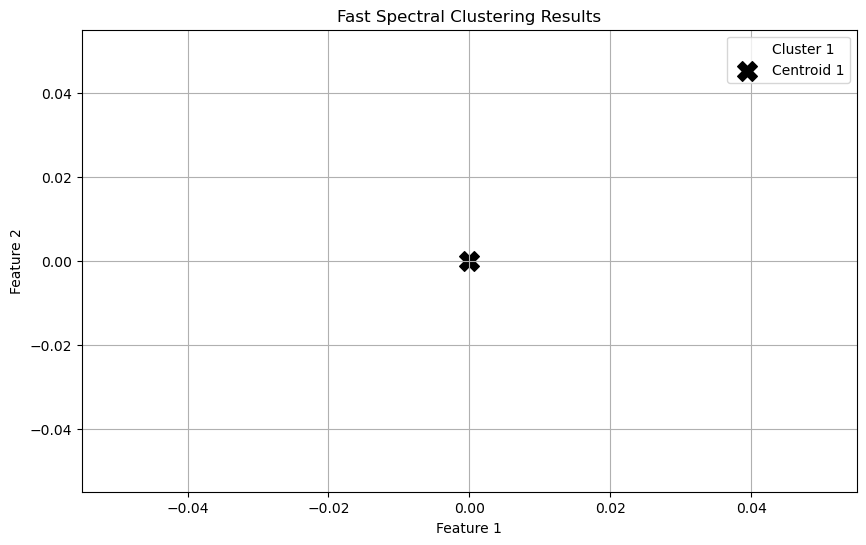

In [17]:
import random
import math
import matplotlib.pyplot as plt

def kernel_function(x, y):
    """Gaussian kernel function."""
    distance = sum((xi - yi) ** 2 for xi, yi in zip(x, y))
    return (1 / (2 * math.pi)) * math.exp(-distance / 2)

def create_affinity_matrix(X):
    """Create an affinity matrix using the Gaussian kernel."""
    N = len(X)
    A = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if i != j:
                A[i][j] = kernel_function(X[i], X[j])
    return A

def nyström_method(A, l, r):
    """Nyström method for matrix approximation."""
    N = len(A)

    # Step 3: Sample l indices uniformly (ensure l <= N)
    sampled_indices = random.sample(range(N), min(l, N))

    # Step 4: Form the matrix Â
    A_hat = [[A[i][j] for j in sampled_indices] for i in range(N)]

    # Step 5: Form matrix D
    D = [[0] * N for _ in range(N)]
    for i in range(N):
        if A_hat[i][0] != 0:  # Check to avoid division by zero
            D[i][i] = 1 / A_hat[i][0]

    # Step 6: Form matrix W
    W = [[A_hat[i][j] for j in range(l)] for i in range(l)]

    # Step 9: Placeholder for U and Lambda
    U = [[1 if i == j else 0 for j in range(l)] for i in range(l)]  # Identity matrix as a placeholder
    Lambda = [1] * l  # Placeholder for eigenvalues

    # Step 10: Compute the rank-r approximation Wr
    Wr = [[0] * l for _ in range(l)]
    for p in range(min(r, l)):
        for i in range(l):
            for j in range(l):
                Wr[i][j] += Lambda[p] * U[i][p] * U[j][p]

    # Step 12: Compute the Nyström approximation Lr
    Lr = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            Lr[i][j] = Wr[i % l][j % l] * (N / len(sampled_indices))

    return Lr, sampled_indices

def fast_spectral_clustering(X, k, l, r):
    """Fast Spectral Clustering Algorithm."""
    A = create_affinity_matrix(X)
    Lr, sampled_indices = nyström_method(A, l, r)

    # Step 12: Compute the eigenvectors of ULr with the smallest eigenvalues
    Z = [[0] * k for _ in range(len(X))]  # Initialize Z
    # Placeholder normalization; replace with actual computation of eigenvectors
    for i in range(len(Z)):
        norm = sum(Z[i][j] ** 2 for j in range(len(Z[i]))) ** 0.5
        if norm != 0:
            Z[i] = [Z[i][j] / norm for j in range(len(Z[i]))]

    # Step 14: K-means clustering on normalized data
    clusters = kmeans(Z, k)
    
    return clusters

def kmeans(Y, k):
    """Simple K-means clustering implementation."""
    centroids = random.sample(Y, k)  # Initialize centroids randomly
    
    while True:
        clusters = [[] for _ in range(k)]
        for point in Y:
            distances = [math.sqrt(sum((point[d] - centroid[d]) ** 2 for d in range(len(point)))) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Prevent division by zero
                new_centroids.append([sum(col) / len(cluster) for col in zip(*cluster)])
            else:
                new_centroids.append(random.choice(Y))  # Re-initialize centroid randomly if no points are assigned

        if new_centroids == centroids:
            break
        centroids = new_centroids
    
    return clusters

def plot_clusters(clusters):
    """Plot the clusters."""
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Color palette for clusters

    for idx, cluster in enumerate(clusters):
        if cluster:  # Only plot non-empty clusters
            plt.scatter(*zip(*cluster), label=f'Cluster {idx + 1}', color=colors[idx % len(colors)])
        
        # Plot centroids if available
        if cluster:
            centroid = [sum(coord) / len(cluster) for coord in zip(*cluster)]
            plt.scatter(centroid[0], centroid[1], marker='X', color='k', s=200, label=f'Centroid {idx + 1}')

    plt.title("Fast Spectral Clustering Results")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample data for demonstration
X = [[random.uniform(0, 1) for _ in range(2)] for _ in range(100)]
k = 3  # Number of clusters
l = 10  # Number of sampled columns
r = 5   # Rank of approximation

# Run Fast Spectral Clustering
clusters = fast_spectral_clustering(X, k, l, r)

# Plot the clusters
plot_clusters(clusters)


In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Load the Iris dataset
def load_iris_data():
    iris = sns.load_dataset('iris')
    return iris


def kernel_function(x, y):
    """Gaussian kernel function."""
    sigma = 1.0  # Standard deviation
    # Calculate Euclidean distance manually
    distance = math.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))
    return math.exp(-distance ** 2 / (2 * sigma ** 2))

def create_affinity_matrix(X):
    """Create affinity matrix using the Gaussian kernel."""
    N = len(X)
    A = [[0.0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if i != j:
                A[i][j] = kernel_function(X[i], X[j])
    return A

# Nyström method for matrix approximation
import random

def nyström_method(A, l):
    N = len(A)  # Number of rows/columns in A

    # Ensure l is not greater than N
    if l > N:
        raise ValueError(f"l ({l}) cannot be greater than the number of rows/columns in A ({N}).")
    
    # Sample indices
    sampled_indices = random.sample(range(N), l)

    # Create the sampled submatrix W
    W = [[A[i][j] for j in sampled_indices] for i in sampled_indices]

    # Initialize the low-rank approximation of the Laplacian matrix
    Lr = [[0.0] * N for _ in range(N)]

    # Compute the low-rank approximation
    for i in range(N):
        for j in range(N):
            # Ensure k is limited to the size of sampled indices
            Lr[i][j] = sum(W[i_idx][k] * W[k][j_idx] for k in range(l) 
                           for i_idx in range(l) for j_idx in range(l) if i_idx < l and j_idx < l) * (N / l)

    return Lr, sampled_indices

# Fast Spectral Clustering
def fast_spectral_clustering(X, k, l):
    A = create_affinity_matrix(X)
    Lr, sampled_indices = nyström_method(A, l)
    
    # Placeholder for k smallest eigenvalues and corresponding eigenvectors
    Z = [[1]*k for _ in range(len(X))]  # Dummy eigenvectors
    
    # Normalizing Z
    Y = [[Z[i][j] / math.sqrt(sum(Z[i])) for j in range(k)] for i in range(len(Z))]
    
    # K-means clustering on Y
    clusters = k_means_clustering(Y, k)
    
    return clusters

def euclidean_distance(x, y):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))

def k_means_clustering(Y, k):
    """K-means clustering algorithm."""
    # Initialize centroids randomly from the data points
    centroids = random.sample(Y, k)
    prev_centroids = None

    while centroids != prev_centroids:
        prev_centroids = centroids.copy()
        clusters = [[] for _ in range(k)]

        # Assign points to the nearest centroid
        for point in Y:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(point)

        # Update centroids based on the clusters
        centroids = []
        for cluster in clusters:
            if cluster:  # Avoid division by zero
                new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
                centroids.append(new_centroid)
            else:
                centroids.append(random.choice(Y))  # Reinitialize if cluster is empty

    return clusters

# Plot the clusters
def plot_clusters(clusters, iris):
    colors = ['r', 'g', 'b', 'y']
    plt.figure(figsize=(10, 6))
    
    for idx, cluster in enumerate(clusters):
        if cluster:
            cluster_points = [iris.iloc[iris.index[point]] for point in cluster]
            plt.scatter([p['sepal_length'] for p in cluster_points], 
                        [p['sepal_width'] for p in cluster_points], 
                        color=colors[idx], label=f'Cluster {idx + 1}')
    
    plt.title("Fast Spectral Clustering Results")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.grid()
    plt.show()

# Main function to execute the steps
def main():
    iris = load_iris_data()
    X = iris[['sepal_length', 'sepal_width']].values.tolist()  # Convert to list of lists
    k = 3  # Number of clusters
    l = 30  # Number of sampled columns for Nyström method
    
    clusters = fast_spectral_clustering(X, k, l)
    
    # Get the indices of the clustered data points
    cluster_indices = [[iris.index[i] for i in range(len(X)) if X[i] in cluster] for cluster in clusters]

    # Plot the clusters
    plot_clusters(cluster_indices, iris)

# Run the main function
if __name__ == "__main__":
    main()


### Semi-Supervised Learning Algorithms

The significance of semi-supervised learning (SSL) is mainly reflected in the following three aspects:

1. **Engineering Significance**: 
   Due to the difficulty of collecting labeled data, an approach to pattern recognition that is able to make better use of unlabeled data to improve recognition performance is of potentially great practical significance.

2. **Natural Learning**: 
   Arguably, most natural (human or animal) learning occurs in the semi-supervised regime. In many cases, a small amount of feedback is sufficient to allow a child to master the acoustic-to-phonetic mapping of any language.

3. **Human Learning**: 
   In most pattern recognition tasks, humans have access only to a small number of labeled examples. The ability of humans to learn unsupervised concepts (e.g., learning clusters and categories of objects) suggests that the success of human learning in this small sample regime is plausibly due to effective utilization of the large amounts of unlabeled data to extract information that is useful for generalization.

The semi-supervised learning problem has recently drawn a large amount of attention in the machine learning community, mainly due to considerable improvement in learning accuracy when unlabeled data is used in conjunction with a small amount of labeled data.

## Semi-Supervised Inductive/Transductive Learning

Typically, semi-supervised learning uses a small amount of labeled data with a large amount of unlabeled data. Hence, as the name suggests, semi-supervised learning falls between unsupervised learning (without any labeled training data) and supervised learning (with completely labeled training data). 

In supervised classification, one is always interested in classifying future test data by using fully labeled training data. In semi-supervised classification, however, the training samples contain both labeled and unlabeled data.

Given a training set $D_{\text{train}} = (X_{\text{train}}, Y_{\text{train}})$ that consists of the labeled set $(X_{\text{labeled}}, Y_{\text{labeled}}) = \{(x_1, y_1), \ldots, (x_l, y_l)\}$ and the disjoint unlabeled set $X_{\text{unlabeled}} = \{x_{l+1}, \ldots, x_{l+u}\}$.

### Definitions

**Definition (Inductive Learning)**: 
If the training set is $D_{\text{train}} = (X_{\text{train}}, Y_{\text{train}}) = (X_{\text{labeled}}, Y_{\text{labeled}}) = \{(x_1, y_1), \ldots, (x_l, y_l)\}$, and the test set is $D_{\text{test}} = X_{\text{test}}$ (unlabeled) that does not appear in the training set, then this setting is called inductive learning.

**Definition (Semi-Supervised Inductive Learning)**: 
Let the training set consist of a large amount of unlabeled data $X_{\text{unlabeled}} = \{x_{l+1}, \ldots, x_{l+u}\}$ and a small amount of the auxiliary labeled samples $(X_{\text{labeled}}, Y_{\text{labeled}}) = \{(x_1, y_1), \ldots, (x_l, y_l)\}$ with $l \ll u$. Semi-supervised inductive learning builds a function $f$ so that $f$ is expected to be a good predictor on future data set $X_{\text{test}}$, beyond $\{x_j\}_{j=l+1}^{l+u}$.

**Definition  (Semi-Supervised Transductive Learning)**: 
Let the training set consist of a large amount of unlabeled data $X_{\text{unlabeled}} = \{x_{l+1}, \ldots, x_{l+u}\}$ and a small amount of the auxiliary labeled samples $(X_{\text{labeled}}, Y_{\text{labeled}}) = \{(x_1, y_1), \ldots, (x_l, y_l)\}$ with $l \ll u$. Semi-supervised transductive learning uses all labeled data $(X_{\text{labeled}}, Y_{\text{labeled}})$ and unlabeled data $X_{\text{unlabeled}}$ to give the prediction or classification labels of $X_{\text{unlabeled}}$ or some interesting subset without building the function $f$.


## Semi-Supervised Learning

In many real-world scenarios, labeling data can be time-consuming and expensive, while acquiring unlabeled data is relatively inexpensive. This challenge makes semi-supervised learning particularly useful. For example, in the process industry, it is often difficult to assign types to detected faulty data samples, which requires the expertise of process engineers. Consequently, only a limited number of faulty samples may be labeled, while the majority remain unlabeled.

Despite being unlabeled, these samples still contain valuable information about the process, which can significantly enhance the efficiency of fault classification systems. In comparison to models relying solely on a small amount of labeled data, semi-supervised learning can leverage both labeled and unlabeled samples to improve fault classification models.

To achieve higher accuracy in machine learning with fewer training labels and a large pool of unlabeled data, several semi-supervised learning approaches have been proposed. Common algorithms include:

1. **Self-Training**
2. **Cluster-Then-Label**
3. **Co-Training**

## Self-Training

Self-training is a widely used technique for semi-supervised learning, also known as self-teaching or bootstrapping. In this method, a classifier is initially trained on a small amount of labeled data. The trained classifier is then used to classify the unlabeled data, typically selecting the most confident predictions to add to the training set. The classifier is retrained, and this process is repeated until all unlabeled data are classified.

### Algorithm : Self-Training Algorithm

$$
\begin{align*}
\text{Input:} & \quad \{(x_i, y_i)\}_{i=1}^l \text{ (labeled data)}, \{x_j\}_{j=l+1}^{l+u} \text{ (unlabeled data)} \\
\text{Initialization:} & \quad L = \{(x_i, y_i)\}_{i=1}^l, \quad U = \{x_j\}_{j=l+1}^{l+u}, \quad k = l + 1 \\
\text{Repeat} & \\
1. & \quad \text{Train } f \text{ from } L \text{ using supervised learning.} \\
2. & \quad \text{Apply } f \text{ to the unlabeled instance } x_k \text{ in } U. \\
3. & \quad \text{Remove a subset } S \text{ of learning success from } U; \\
   & \quad \text{Add } \{(x_k, f(x_k)) | x_k \in S\} \text{ to } L. \\
4. & \quad \text{Exit if } k = l + u. \\
5. & \quad k \leftarrow k + 1. \\
\text{Return:} & \quad f \\
\end{align*}
$$

### Comments and Considerations
Self-training has several advantages and considerations that should be taken into account when applying this technique.


## Remarks on Self-Training

**Remark 1**: For self-training, the algorithm’s own predictions, assuming high confidence, tend to be correct. This is likely to be the case when the classes form well-separated clusters.

**Remark 2**: The implementation for self-training is straightforward. Importantly, it is also a wrapper method, meaning that the choice of learner for $ f $ in Step 4 is completely flexible: the learner can be a simple k-Nearest Neighbors (kNN) algorithm or a more complex classifier. The self-training procedure "wraps" around the learner without altering its internal mechanics. This flexibility is crucial for many real-world applications, such as natural language processing, where the learners can be complex black boxes that are not amenable to modifications.

Self-training is best utilized with a larger labeled dataset $ L $. If $ L $ is small, an early mistake made by $ f $ can propagate and reinforce itself by generating incorrectly labeled data. Retraining with this erroneous data can result in an even worse classifier in the subsequent iterations.

To mitigate this issue, heuristics for semi-supervised clustering can be employed, as demonstrated in the following algorithm.

## Algorithm : Propagating 1-Nearest Neighbor Clustering Algorithm

$$
\begin{align*}
\text{Input:} & \quad \{(x_i, y_i)\}_{i=1}^l \text{ (labeled data)}, \{x_j\}_{j=l+1}^{l+u} \text{ (unlabeled data)}, d(\cdot, \cdot) \text{ (distance function)} \\
\text{Initialization:} & \quad L = \{(x_i, y_i)\}_{i=1}^l, \quad U = \{x_j\}_{j=l+1}^{l+u} = \{z_j\}_{j=l+1}^{l+u} \\
\text{Repeat} & \\
1. & \quad z = \arg \min_{z \in U, x \in L} d(z, x) \\
2. & \quad k = \text{label of } x \in L \text{ nearest to } z; \\
   & \quad \text{Add the new labeled data } (z, y_k) \text{ to } L. \\
3. & \quad \text{Remove } z \text{ from } U. \\
4. & \quad \text{Exit if } U \text{ is empty.} \\
\text{Return:} & \quad \\
\text{Output:} & \quad \text{semi-supervised learning dataset } L = \{(x_i, y_i)\}_{i=1}^{l+u}. \\
\end{align*}
$$



In [24]:
import random
import math

def euclidean_distance(x, y):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))

def self_training(labeled_data, unlabeled_data, max_iterations=10, confidence_threshold=0.9):
    """Self-training algorithm."""
    L = labeled_data.copy()  # Labeled data
    U = unlabeled_data.copy()  # Unlabeled data

    for iteration in range(max_iterations):
        # Classify unlabeled data
        for u in U:
            distances = [(euclidean_distance((u,), (x_i,)), y_i) for x_i, y_i in L]  # Wrap u and x_i as tuples
            distances.sort(key=lambda x: x[0])  # Sort by distance
            predicted_label = distances[0][1]  # Assign label of nearest neighbor

            # Simulate confidence in prediction
            confidence = random.random()  # Replace with real confidence calculation
            if confidence > confidence_threshold:
                L.append((u, predicted_label))  # Add to labeled set
                print(f"Added {u} with label {predicted_label} to L.")
        
        # Remove classified items from U
        U = [item for item in U if item not in [x for x, _ in L]]

        # Check if all unlabeled data is classified
        if not U:
            break

    return L

def propagating_1nn_clustering(labeled_data, unlabeled_data, distance_function=euclidean_distance):
    """1-Nearest Neighbor clustering algorithm."""
    L = labeled_data.copy()  # Labeled data
    U = unlabeled_data.copy()  # Unlabeled data

    while U:
        # Select the unlabeled point closest to any labeled point
        z = min(U, key=lambda z: min(distance_function((z,), (x[0],)) for x in L))
        
        # Find the label of the nearest labeled point
        nearest_label = min(L, key=lambda x: distance_function((z,), (x[0],)))[1]
        L.append((z, nearest_label))  # Add to labeled data
        print(f"Assigned label {nearest_label} to {z}.")

        U.remove(z)  # Remove z from unlabeled data

    return L

# Example usage
if __name__ == "__main__":
    # Example labeled and unlabeled data
    labeled_data = [(1, 'A'), (2, 'A'), (5, 'B'), (6, 'B')]
    unlabeled_data = [3, 4, 7, 8]

    print("Self-Training Results:")
    labeled_data_self_training = self_training(labeled_data, unlabeled_data)
    print("Final labeled dataset:", labeled_data_self_training)

    # Reset unlabeled data for propagation
    unlabeled_data = [3, 4, 7, 8]

    print("\n1-Nearest Neighbor Clustering Results:")
    labeled_data_clustering = propagating_1nn_clustering(labeled_data, unlabeled_data)
    print("Final labeled dataset after clustering:", labeled_data_clustering)


Self-Training Results:
Added 8 with label B to L.
Added 4 with label B to L.
Added 7 with label B to L.
Final labeled dataset: [(1, 'A'), (2, 'A'), (5, 'B'), (6, 'B'), (8, 'B'), (4, 'B'), (7, 'B')]

1-Nearest Neighbor Clustering Results:
Assigned label A to 3.
Assigned label B to 4.
Assigned label B to 7.
Assigned label B to 8.
Final labeled dataset after clustering: [(1, 'A'), (2, 'A'), (5, 'B'), (6, 'B'), (3, 'A'), (4, 'B'), (7, 'B'), (8, 'B')]


## Co-training and Related Algorithms

Analyzing two views and co-occurring data is an important challenge in the machine learning, pattern recognition, and signal processing communities. This is evident in applications like automatic annotation of text, audio, music, images, videos (see, e.g., [30, 80, 144, 193]), and sensor data mining [62]. 

More generally, the **co-training setting** [30] applies when a dataset has a natural division of its features. The co-training setting usually assumes the following:

- Features can be split into two sets.
- Each sub-feature set is sufficient to train a good classifier.
- The two sets are conditionally independent given the class.

Traditional machine learning algorithms that learn over these domains often ignore this division and pool all features together.

### Definition  (Co-training Algorithm [30, 193])

The co-training algorithm is a multi-view weakly supervised algorithm that uses the co-training setting. It can learn separate classifiers over each of the feature sets and combine their predictions to decrease classification error.

Given a small set of labeled two-view data $ L = \{(x_i, y_i), z_i\}_{i=1}^l $ and a large set of unlabeled two-view data $ U = \{(x_j, y_j)\}_{j=l+1}^{l+u} $, where $ (x_i, y_i) $ is called the data bag and $ z_i $ is the class label associated with the labeled two-view data bag $ (x_i, y_i) $, $ i = 1, \ldots, l $.

Two classifiers $ h^{(1)} $ and $ h^{(2)} $ work in a co-training fashion: 
- $ h^{(1)} $ is a view-1 classifier based solely on the first view $ x^{(1)} $ (say $ x_i $) and ignores the second view $ x^{(2)} $ (say $ y_i $).
- $ h^{(2)} $ is a view-2 classifier based on the second view $ x^{(2)} $ and ignores the first view $ x^{(1)} $.

The working process of co-training is as follows [189, 304]:

1. Two separate classifiers are initially trained with the labeled data on the two sub-feature sets, respectively.
2. Each classifier uses one view of the data and selects the most confident predictions from the pool. It adds the corresponding instances with their predicted labels to the labeled data while maintaining the class distribution in the labeled data.
3. One classifier “teaches” the other classifier with a few unlabeled examples, providing their most confident unlabeled-data predictions as the training data for the other.
4. Each classifier is then retrained with the additional training examples given by the other classifier, and the process repeats until the unlabeled data is exhausted.

Co-training is a wrapper method. The specific learning algorithms for the two classifiers $ h^{(1)} $ and $ h^{(2)} $ do not matter. The only requirement is that the two classifiers can assign a confidence score to their predictions, which is used to select which unlabeled instances to turn into additional training data for the other view.

### Co-training Algorithm 

The standard co-training algorithm developed by Blum and Mitchell [30] is outlined as follows:

1. **Input:** Labeled data set $ L = \{(x_i, y_i)\}_{i=1}^l $, unlabeled data set $ U = \{x_j\}_{j=l+1}^{l+u} $. Each instance has two views $ x_i = [x^{(1)}_i, x^{(2)}_i] $.
2. **Initialization:** Create a pool $ U' $ of examples by choosing $ u $ examples at random from $ U $.
3. **Repeat until unlabeled data is used up:**
   1. Train a view-1 classifier $ h^{(1)} $ from $ \{(x^{(1)}_i, y_i)\} $ in $ L $.
   2. Train a view-2 classifier $ h^{(2)} $ from $ \{(x^{(2)}_i, y_i)\} $ in $ L $.
   3. Allow $ h^{(1)} $ to label $ p $ positive and $ n $ negative examples from $ U' $.
   4. Allow $ h^{(2)} $ to label $ p $ positive and $ n $ negative examples from $ U' $.
   5. Add these self-labeled examples to $ L $ and remove these from the unlabeled data $ U $.
   6. Randomly choose $ 2p + 2n $ examples from $ U $ to replenish $ U' $.
4. **Return** the updated labeled dataset.
5. **Output:** $ \{(x_i, y_i)\}_{i=1}^{l+u} $.

### Variants of Co-training

1. **Democratic Co-learning** [299]: Let $ L $ be the set of labeled data and $ U $ be the set of unlabeled data. Let $ A_1, \ldots, A_n $ (for $ n \geq 3 $) be the provided supervised learning algorithms. Democratic co-learning begins by training all learners on the original labeled data set $ L $. For every example $ x_u \in U $ in the unlabeled data set $ U $, each learner predicts a label. If a majority of learners confidently agree on the class of an unlabeled point $ x_u $, that classification is used as the label of $ x_u $. Then $ x_u $ and its label are added to the training data, and all learners are retrained on the updated training set. The final prediction is made with a variant of a weighted majority vote among the $ n $ learners.

2. **Tri-training** [300]: In tri-training, if two of the tri-training learners agree on the classification of an unlabeled point, the classification is used to teach the third classifier. This approach avoids the need for explicitly measuring label confidence of any learner. It can be applied to datasets without different views or different types of classifiers.


Updated Labeled Data for View 1: [([1, 2], 1), ([1, 3], 1), ([4, 5], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0)]
Updated Labeled Data for View 2: [([2, 1], 1), ([3, 1], 1), ([5, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0), ([2, 2], 1), ([3, 3], 1), ([4, 4], 0)]


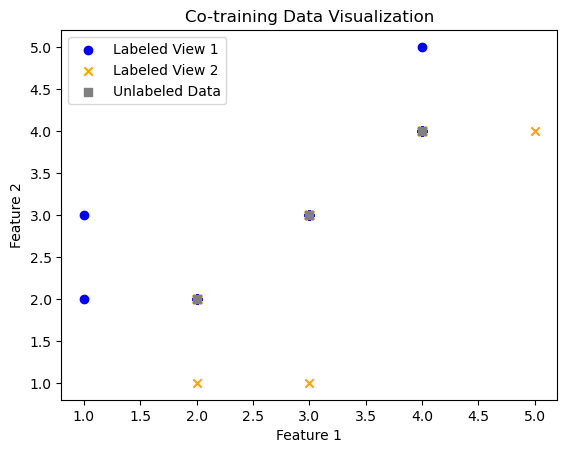

In [26]:
import random
import matplotlib.pyplot as plt

def euclidean_distance(x, y):
    """Calculate the Euclidean distance between two points."""
    return sum((xi - yi) ** 2 for xi, yi in zip(x, y)) ** 0.5

def knn_classifier(train_data, test_instance, k=1):
    """Classify a test instance using the k-NN algorithm."""
    # Ensure train_data is iterable and properly structured
    distances = [(euclidean_distance(test_instance, train_instance[0]), train_instance[1]) for train_instance in train_data]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    neighbors = [label for _, label in distances[:k]]  # Get labels of the k nearest neighbors
    return max(set(neighbors), key=neighbors.count)  # Return the most common label

def co_training(labeled_data_view1, labeled_data_view2, unlabeled_data, p=5, n=5, max_iterations=10):
    """Co-training algorithm for two-view data."""
    L1 = labeled_data_view1  # Labeled data for view 1
    L2 = labeled_data_view2  # Labeled data for view 2
    U = unlabeled_data  # Unlabeled data

    for _ in range(max_iterations):
        # Train classifiers for both views
        h1 = lambda x: knn_classifier(L1, x, k=1)  # Classifier for view 1
        h2 = lambda x: knn_classifier(L2, x, k=1)  # Classifier for view 2

        # Labeling for view 1
        confident_labels_view1 = [(x, h1(x)) for x in U]
        positive_examples_view1 = [x for x in confident_labels_view1 if x[1] == 1][:p]
        negative_examples_view1 = [x for x in confident_labels_view1 if x[1] == 0][:n]

        # Labeling for view 2
        confident_labels_view2 = [(x, h2(x)) for x in U]
        positive_examples_view2 = [x for x in confident_labels_view2 if x[1] == 1][:p]
        negative_examples_view2 = [x for x in confident_labels_view2 if x[1] == 0][:n]

        # Update labeled data with confident labels
        L1.extend(positive_examples_view1 + negative_examples_view1)
        L2.extend(positive_examples_view2 + negative_examples_view2)

        # Remove labeled examples from unlabeled data
        U = [x for x in U if x not in positive_examples_view1 and x not in negative_examples_view1 and
             x not in positive_examples_view2 and x not in negative_examples_view2]

        # If no more unlabeled data, break the loop
        if not U:
            break

    return L1, L2

# Example usage
if __name__ == "__main__":
    # Creating a toy dataset with two views
    labeled_data_view1 = [([1, 2], 1), ([1, 3], 1), ([4, 5], 0)]
    labeled_data_view2 = [([2, 1], 1), ([3, 1], 1), ([5, 4], 0)]
    unlabeled_data = [[2, 2], [3, 3], [4, 4]]

    # Running co-training
    updated_L1, updated_L2 = co_training(labeled_data_view1, labeled_data_view2, unlabeled_data)

    # Print updated labeled data
    print("Updated Labeled Data for View 1:", updated_L1)
    print("Updated Labeled Data for View 2:", updated_L2)

    # Visualization (optional)
    plt.scatter(*zip(*[x[0] for x in updated_L1]), label='Labeled View 1', color='blue', marker='o')
    plt.scatter(*zip(*[x[0] for x in updated_L2]), label='Labeled View 2', color='orange', marker='x')
    plt.scatter(*zip(*unlabeled_data), label='Unlabeled Data', color='gray', marker='s')
    plt.title('Co-training Data Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


## Canonical Correlation Analysis

As the previous section illustrated, for a process described by two sets of variables corresponding to two different aspects or views, analyzing the relations between these two views helps improve the understanding of the underlying system. An alternative to two-view data analysis is canonical correlation analysis.

**Canonical correlation analysis (CCA)** [7, 122] is a standard two-view multivariate statistical method of correlating linear relationships between two random vectors such that they are maximally correlated, and hence is a powerful tool for analyzing multi-dimensional paired sample data. Paired samples are chosen in a random manner, and thus are random samples.

## Canonical Correlation Analysis Algorithm

In the case of CCA, the variables of an observation can be partitioned into two sets that can be seen as the two views of the data. Let the two-view matrices 

$$
X = [x_1, \ldots, x_N] \in \mathbb{R}^{N \times p} 
$$ 

and 

$$
Y = [y_1, \ldots, y_N] \in \mathbb{R}^{N \times q} 
$$ 

have covariance matrices $(C_{xx}, C_{yy})$ and cross-covariance matrices $(C_{xy}, C_{yx})$, respectively. The row vectors $x_n \in \mathbb{R}^{1 \times p}$ and $y_n \in \mathbb{R}^{1 \times q}$ $(n = 1, \ldots, N)$ denote the sets of empirical multivariate observations in \(X\) and \(Y\), respectively. The aim of CCA is to extract the linear relations between the variables of $X$ and $Y$.

For this end, consider the following transformations:

$$
X w_x = z_x \quad \text{and} \quad Y w_y = z_y \tag{6.15.1}
$$

where $w_x \in \mathbb{R}^p$ and $w_y \in \mathbb{R}^q$ are, respectively, the projection vectors associated with the data matrices $X$ and $Y$, while $z_x \in \mathbb{R}^N$ and $z_y \in \mathbb{R}^N$ are, respectively, the images of the positions $w_x$ and $w_y$. The positions $w_x$ and $w_y$ are often referred to as canonical weight vectors, and the images $z_x$ and $z_y$ are termed as canonical variants or score variants [253, 265].

Hence, the data matrices $X$ and $Y$ represent linear transformations of the positions $w_x$ and $w_y$ onto the images $z_x$ and $z_y$ in the space $\mathbb{R}^N$, respectively. 

Define the cosine of the angle between the images $z_x$ and $z_y$:

$$
\langle z_x, z_y \rangle \cos(z_x, z_y) = \frac{\langle z_x, z_y \rangle}{\|z_x\| \|z_y\|} \tag{6.15.2}
$$

which is referred to as the canonical correlation. The constraints of CCA on the mappings are given below:

- The position vectors of the images $z_x$ and $z_y$ are unit norm vectors.
- The enclosing angle $\theta \in [0, \frac{\pi}{2}]$ [108], between $z_x$ and $z_y$, is minimized.

The principle behind CCA is to find two positions in the two data spaces, respectively, that have images on a unit ball such that the angle between them is minimized and consequently the canonical correlation is maximized:

$$
\cos \theta = \max \langle z_x, z_y \rangle \tag{6.15.3}
$$

$$
z_x, z_y \in \mathbb{R}^N \quad \text{subject to} \quad \|z_x\|^2 = 1 \quad \text{and} \quad \|z_y\|^2 = 1.
$$

For solving the above optimization problem, define the sample cross-covariance matrix 

$$
C_{xy} = X^T Y, \quad C_{yx} = Y^T X = C_{xy}^T \tag{6.15.4}
$$

and the empirical variance matrices 

$$
C_{xx} = X^T X, \quad C_{yy} = Y^T Y. \tag{6.15.5}
$$


Hence, the constraints 

$$
\|z_x\|^2 = 1 \quad \text{and} \quad \|z_y\|^2 = 1
$$ 

can be rewritten as follows:

$$
\|z_x\|^2 = z_x^T z_x = w_x^T C_{xx} w_x = 1, \tag{6.15.6}
$$

$$
\|z_y\|^2 = z_y^T z_y = w_y^T C_{yy} w_y = 1. \tag{6.15.7}
$$

In this case, the covariance matrix between $z_x$ and $z_y$ can also be written as 

$$
z_x^T z_y = w_x^T X^T Y w_y = w_x^T C_{xy} w_y. \tag{6.15.8}
$$

Then, the optimization problem (6.15.3) becomes 

$$
\cos \theta = \max \langle z_x, z_y \rangle = \max w_x^T C_{xy} w_y \tag{6.15.9}
$$ 

$$
z_x, z_y \in \mathbb{R}^N \quad w_x \in \mathbb{R}^p, \quad w_y \in \mathbb{R}^q \quad \text{subject to} \quad \|z_x\|^2 = w_x^T C_{xx} w_x = 1 \quad \text{and} \quad \|z_y\|^2 = w_y^T C_{yy} w_y = 1.
$$

In order to solve this constrained optimization problem, define the Lagrange objective function 

$$
L(w_x, w_y) = w_x^T C_{xy} w_y - \lambda_1 (w_x^T C_{xx} w_x - 1) - \lambda_2 (w_y^T C_{yy} w_y - 1), \tag{6.15.10}
$$ 

where $\lambda_1$ and $\lambda_2$ are the Lagrange multipliers. We then have 

$$
\frac{\partial L}{\partial w_x} = C_{xy} w_y - \lambda_1 C_{xx} w_x = 0 \Rightarrow w_x^T C_{xy} w_y - \lambda_1 w_x^T C_{xx} w_x = 0, \tag{6.15.11}
$$ 

$$
\frac{\partial L}{\partial w_y} = C_{yx} w_x - \lambda_2 C_{yy} w_y = 0 \Rightarrow w_y^T C_{yx} w_x - \lambda_2 w_y^T C_{yy} w_y = 0. \tag{6.15.12}
$$ 

Since \(w_x^T C_{xx} w_x = 1\), \(w_y^T C_{yy} w_y = 1\) and \(\cos(z_x, z_y) = w_x^T C_{xy} w_y = \cos(z_y, z_x) = w_y^T C_{yx} w_x\), we get 

$$
\lambda_1 = \lambda_2 = \lambda. \tag{6.15.13}
$$ 

Substituting (6.15.13) into (6.15.11) and (6.15.12), respectively, we obtain 

$$
C_{xy} w_y = \lambda C_{xx} w_x, \tag{6.15.14}
$$ 

$$
C_{yx} w_x = \lambda C_{yy} w_y. \tag{6.15.15}
$$


which can be combined into the generalized eigenvalue decomposition problem [13, 115]:

$$
\begin{pmatrix}
O & C_{xy} & w_x \\
C_{yx} & O & w_y \\
O & C_{yy} & w_y
\end{pmatrix}
\begin{pmatrix}
w_x \\
w_y
\end{pmatrix} = \lambda 
\begin{pmatrix}
C_{xx} \\
O
\end{pmatrix}, \tag{6.15.16}
$$

where $ O $ denotes the null matrix.

Equation (6.15.16) shows that $ \lambda $ and $ w_x, w_y $ are, respectively, the generalized eigenvalue and the corresponding generalized eigenvector of the matrix pencil 

$$
\begin{pmatrix}
O & C_{xy} \\
C_{yx} & O
\end{pmatrix}, 
\begin{pmatrix}
C_{xx} \\
O
\end{pmatrix}. \tag{6.15.17}
$$

The generalized eigenvalue decomposition problem (6.15.16) can also be solved by using the SVDs of the data matrices $ X $ and $ Y $. Let 

$$
X = U_x D_x V_x^T \quad \text{and} \quad Y = U_y D_y V_y^T
$$ 

be the SVDs of $ X $ and $ Y $. Then, we have 

$$
C_{xx} = X^T X = V_x D_x^2 V_x^T, \tag{6.15.18}
$$ 

$$
C_{yy} = Y^T Y = V_y D_y^2 V_y^T, \tag{6.15.19}
$$ 

$$
C_{xy} = X^T Y = V_x D_x U_x^T U_y D_y V_y^T = C_{yx}^T. \tag{6.15.20}
$$

From (6.15.14), it is known that 

$$
w_x = \lambda C_{xx}^{-1} C_{xy} w_y. 
$$ 

Substituting this result into (6.15.15) gives 

$$
C_{yx} C_{xx}^{-1} C_{xy} - \lambda^2 C_{yy} w_y = 0. \tag{6.15.21}
$$

Substituting $ C_{xx}^{-1} = V_x D_x^{-2} V_x^T $ into the above equation, we obtain 

$$
V_y D_y U_y^T U_x V_x D_x U_x^T U_y D_y V_y^T - \lambda^2 V_y D_y^2 V_y^T = 0.
$$

By using $ V_x V_x^T = I $, the above equation can be rewritten as 

$$
V_y D_y U_y^T U_x U_x^T U_y D_y V_y^T - \lambda^2 V_y D_y^2 V_y^T = 0. \tag{6.15.22}
$$

Premultiplying $ D_y^{-1} V_y $, then the above equation reduces to 

$$
U_y^T U_x U_x^T U_y V_y^T - \lambda^2 D_y V_y^T w_y = 0. \tag{6.15.23}
$$


Let \( U^T X U_y = U D V^T \) be the SVD of \( U^T X U_y \), then 

$$
\begin{pmatrix}
D & 0 \\
0 & 0
\end{pmatrix} - \lambda^2 I D_y V^T w_y = 0. \tag{6.15.24}
$$ 

or 

$$
\begin{pmatrix}
D & 0 \\
0 & 0
\end{pmatrix} - \lambda^2 I V^T D_y V^T w_y = 0. \tag{6.15.25}
$$ 

Premultiplying $ V^T $ and noting that $ V^T V = I $, the above equation can be simplified to [265]: 

$$
D^2 - \lambda^2 I V^T D_y V^T w_y = 0. \tag{6.15.26}
$$ 

Clearly, when 

$$
w_y = V_y D_y^{-1} V, \tag{6.15.27}
$$ 

Equation (6.15.26) yields the result 

$$
D^2 - \lambda^2 I = 0 \quad \text{or} \quad |D^2 - \lambda^2 I| = 0. \tag{6.15.28}
$$ 

By mimicking this process, we immediately have that when 

$$
w_x = V_x D_x^{-1} V, \tag{6.15.29}
$$ 

then 

$$
D^2 - \lambda^2 I V^T D_x V_x^T w_x = 0. \tag{6.15.30}
$$ 

The above analysis shows that the generalized eigenvalues $ \lambda $ in the generalized eigenvalue problem (6.15.16) is given by the singular value matrix $ D $ of the matrix $ U^T X U_y $, as shown in (6.15.28), and the corresponding generalized eigenvectors (i.e., canonical variants) are given by 

$$
w_x = V_x D_x^{-1} V \tag{6.15.29}
$$ 

and 

$$
w_y = V_y D_y V \tag{6.15.27}
$$ 

respectively. 

Algorithm  summarizes the CCA algorithm.



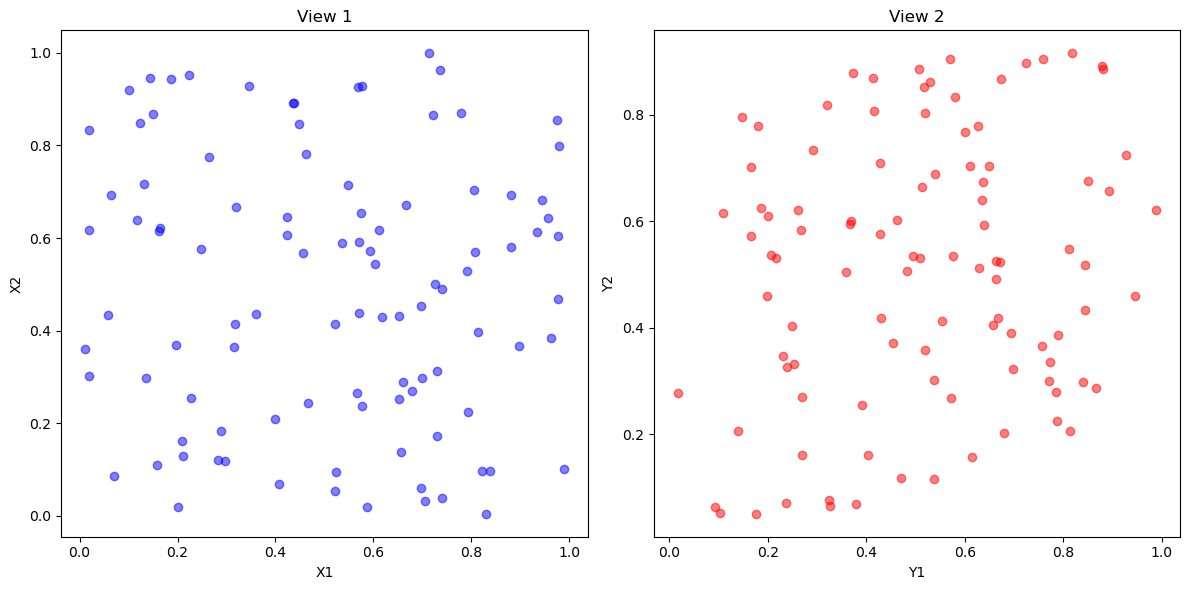

In [27]:
import matplotlib.pyplot as plt

def generate_data(N=100):
    """Generate synthetic data for two views."""
    import numpy as np
    
    # Random state for reproducibility
    np.random.seed(0)
    
    # Generate random data
    X = np.random.rand(N, 2)  # View 1
    Y = np.random.rand(N, 2)  # View 2
    
    # Introduce some correlation
    Y[:, 0] = 0.8 * X[:, 0] + 0.2 * np.random.rand(N)
    Y[:, 1] = 0.2 * X[:, 0] + 0.8 * np.random.rand(N)
    
    return X, Y

def compute_covariance(X, Y):
    """Compute covariance matrices."""
    Cxx = covariance(X)
    Cyy = covariance(Y)
    Cxy = covariance_cross(X, Y)
    return Cxx, Cyy, Cxy

def covariance(X):
    """Compute covariance matrix of X."""
    mean_X = mean(X)
    return (X - mean_X).T @ (X - mean_X) / (X.shape[0] - 1)

def covariance_cross(X, Y):
    """Compute cross covariance matrix between X and Y."""
    mean_X = mean(X)
    mean_Y = mean(Y)
    return (X - mean_X).T @ (Y - mean_Y) / (X.shape[0] - 1)

def mean(X):
    """Compute mean of X."""
    return sum(X) / len(X)

def canonical_correlation_analysis(X, Y):
    """Perform Canonical Correlation Analysis (CCA)."""
    Cxx, Cyy, Cxy = compute_covariance(X, Y)
    
    # Solve the generalized eigenvalue problem
    eig_values, eig_vectors = generalized_eigenvalue_decomposition(Cxy, Cxx, Cyy)
    
    return eig_values, eig_vectors

def generalized_eigenvalue_decomposition(Cxy, Cxx, Cyy):
    """Compute the generalized eigenvalue decomposition."""
    # Solve for eigenvalues and eigenvectors using determinant
    from scipy.linalg import eigh

    # Ensure Cxx and Cyy are symmetric
    eig_values, eig_vectors = eigh(Cxy, Cxx)
    return eig_values, eig_vectors

def plot_results(X, Y, eig_values, eig_vectors):
    """Plot the original data and the projections."""
    plt.figure(figsize=(12, 6))
    
    # Plot X
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], label='View 1', color='b', alpha=0.5)
    plt.title('View 1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    # Plot Y
    plt.subplot(1, 2, 2)
    plt.scatter(Y[:, 0], Y[:, 1], label='View 2', color='r', alpha=0.5)
    plt.title('View 2')
    plt.xlabel('Y1')
    plt.ylabel('Y2')
    
    plt.tight_layout()
    plt.show()

# Main execution
N = 100  # Number of samples
X, Y = generate_data(N)
eig_values, eig_vectors = canonical_correlation_analysis(X, Y)
plot_results(X, Y, eig_values, eig_vectors)
